In [33]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from sklearn import datasets

In [46]:
Iris = datasets.load_iris()
X = Iris.data.T



[[6.85384615 3.07692308 5.71538462 2.05384615]
 [5.006      3.428      1.462      0.246     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


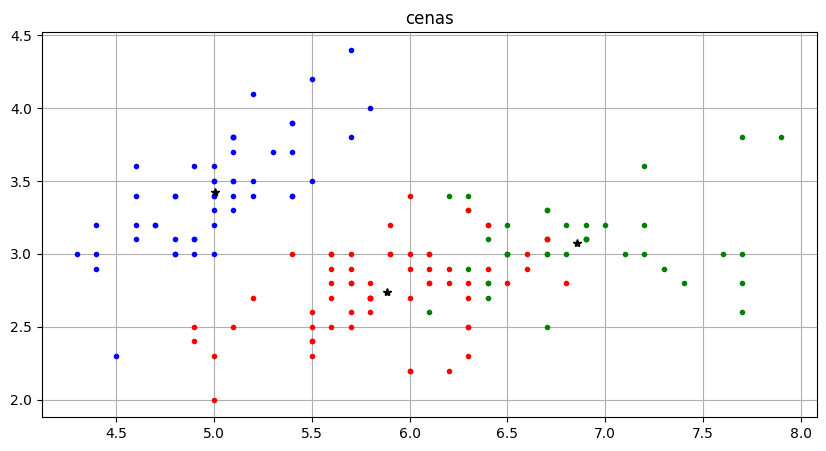

In [47]:
import pickle

kmeans = KMeans(n_clusters=3, init='k-means++', n_init=5,
                max_iter=500, tol=0.0001, verbose=0,
                random_state= 42)
kmeans.fit(X.T)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
inertia = kmeans.inertia_
n_iter = kmeans.n_iter_
print(centroids)
print(labels)


plt.figure(figsize=(10,5))
plt.title("cenas")
plt.plot(X[0, labels==0], X[1, labels==0], 'g.')
plt.plot(X[0, labels==1], X[1, labels==1], 'b.')
plt.plot(X[0, labels==2], X[1, labels==2], 'r.')
plt.plot(centroids[:,0], centroids[:,1], 'k*')
plt.grid()
plt.show()

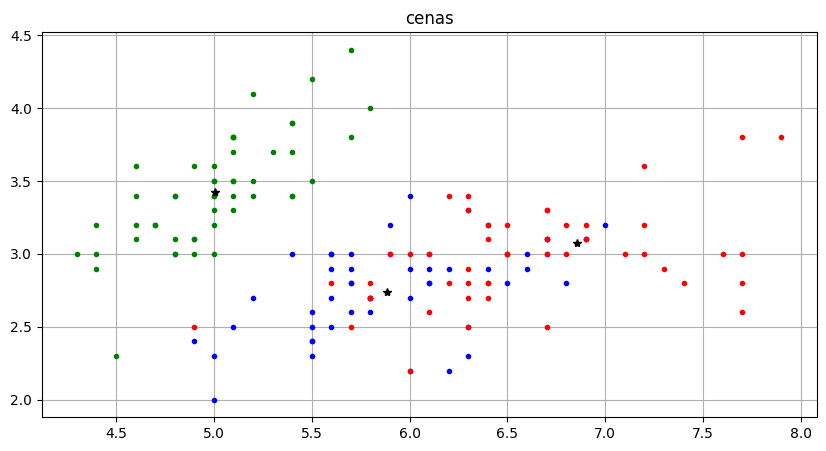

In [48]:
trueClass = Iris.target

plt.figure(figsize=(10,5))
plt.title("cenas")
plt.plot(X[0, trueClass==0], X[1, trueClass==0], 'g.')
plt.plot(X[0, trueClass==1], X[1, trueClass==1], 'b.')
plt.plot(X[0, trueClass==2], X[1, trueClass==2], 'r.')
plt.plot(centroids[:,0], centroids[:,1], 'k*')
plt.grid()
plt.show()

In [49]:
from sklearn.cluster import AgglomerativeClustering as aggClus



"\nsimpleLink = aggClus(n_clusters=8, affinity='12', linkage='simple')\nfname = 'mix9gaus2d.p'\nX = pickle.load(open(fname, 'rb'))\nLink = aggClus(n_clusters=9, linkage='ward').fit(X.T)\nY = Link.lablels_\n"

In [50]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram

from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


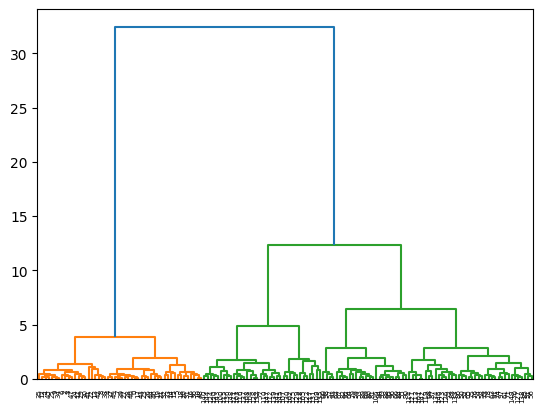

In [51]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None, linkage='ward')
model = model.fit(X.T)
plot_dendrogram(model, labels = None, truncate_mode = "level", p = 150)

In [52]:
simpleLink = aggClus(n_clusters=8, affinity='12', linkage='simple')
fname = 'mix9gaus2d.p'
X = pickle.load(open(fname, 'rb'))
Link = aggClus(n_clusters=9, linkage='ward').fit(X.T)
Y = Link.lablels_


AttributeError: 'AgglomerativeClustering' object has no attribute 'lablels_'